In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_pickle("post-diwali-pickled")
df.head()

,DATE,SHOP_ID,PINCODE,SHOP,ITEM_ID,HR of the day,ORDERS,QTY,ITEM_GMV,CATEGORY
0,2019-10-25,59264.0,400058.0,Bhikharam Chandmal,28489567.0,252.0,1.0,1.0,600.0,Mobiles
1,2019-10-26,185364.0,400144.0,SHRI KHANDELWAL LAPTOP Shop,40969708.0,231.0,1.0,1.0,400.0,Mobiles
2,2019-10-22,188886.0,411094.0,Trupthi KLK ELECTRONICS,41344294.0,252.0,1.0,1.0,150.0,Tablets
3,2019-10-21,185364.0,400144.0,SHRI KHANDELWAL LAPTOP Shop,40969716.0,378.0,2.0,4.0,800.0,TV
4,2019-10-18,186348.0,413849.0,New Gokul Cell phones,40970957.0,231.0,1.0,1.0,450.0,Tablets


In [3]:
df['ITEM_ID'].nunique()

47023

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267431 entries, 0 to 267430
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DATE           267430 non-null  datetime64[ns]
 1   SHOP_ID        267430 non-null  float64       
 2   PINCODE        267430 non-null  float64       
 3   SHOP           267430 non-null  object        
 4   ITEM_ID        267430 non-null  float64       
 5   HR of the day  267430 non-null  float64       
 6   ORDERS         267430 non-null  float64       
 7   QTY            267430 non-null  float64       
 8   ITEM_GMV       267431 non-null  float64       
 9   CATEGORY       267430 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 20.4+ MB


In [5]:
df[df['DATE'].isnull()]

,DATE,SHOP_ID,PINCODE,SHOP,ITEM_ID,HR of the day,ORDERS,QTY,ITEM_GMV,CATEGORY
267430,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.805996e+08,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
tot_ord = df['ORDERS'].sum()
tot_gmv = df['ITEM_GMV'].sum()

print("Total orders: %d " % int(tot_ord))
print("Total GMV of: %f crores" % (tot_gmv/10000000))

Total orders: 363445 
Total GMV of: 58.059956 crores


In [8]:
loc = ['PINCODE','SHOP_ID','SHOP']

for i in loc:
    val = df[i].nunique()
    print("{} - {} unique values".format(i,val))

PINCODE - 256 unique values
SHOP_ID - 1094 unique values
SHOP - 942 unique values


In [9]:
df['CATEGORY'].value_counts()/2674.31

Mobiles              38.958086
Earphones            33.652419
Tablets              12.617460
Speakers              5.558069
Laptops               3.924751
Charger               2.198698
TV                    2.041274
Other Electronics     1.048869
Name: CATEGORY, dtype: float64

## Date wise comparison

In [10]:
by_date = df.groupby('DATE').sum()[['ORDERS','ITEM_GMV']]
by_date['ITEM_GMV (crores)'] = np.round(by_date['ITEM_GMV']/10000000,decimals=3)
# by_date['% TOT ORD'] = np.round(by_date['ORDERS']/2415.85,decimals=2)
by_date['% TOT GMV'] = np.round(by_date['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=2)
by_date.drop(['ORDERS','ITEM_GMV'],axis=1)

,ITEM_GMV (crores),% TOT GMV
DATE,,
2019-10-18,3.410,5.87
2019-10-19,4.062,7.00
2019-10-20,4.889,8.42
2019-10-21,3.693,6.36
2019-10-22,4.024,6.93
2019-10-23,4.265,7.35
2019-10-24,5.379,9.26
2019-10-25,6.658,11.47
2019-10-26,8.909,15.35


In [11]:
dates = []

for date in by_date.index :
    dates.append(str(date)[-14:-9])
    
dates[0]

'10-18'

<AxesSubplot:ylabel='ITEM_GMV'>

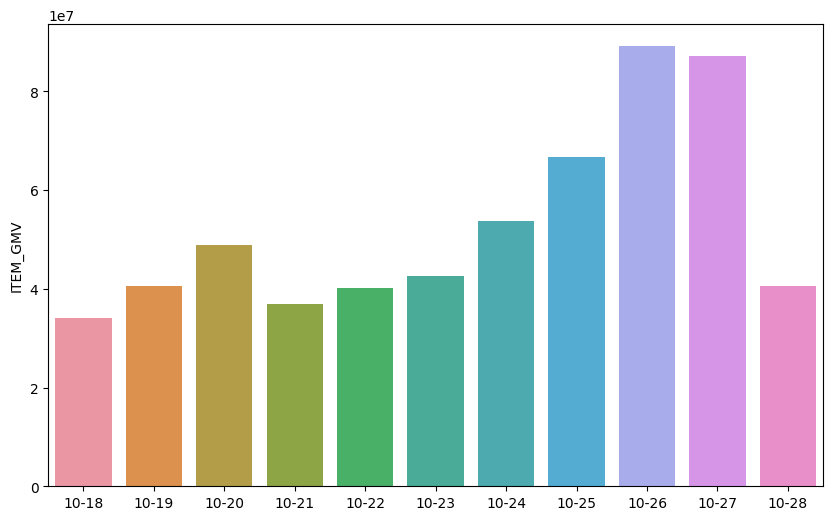

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=dates,y=by_date.ITEM_GMV)

<AxesSubplot:ylabel='ORDERS'>

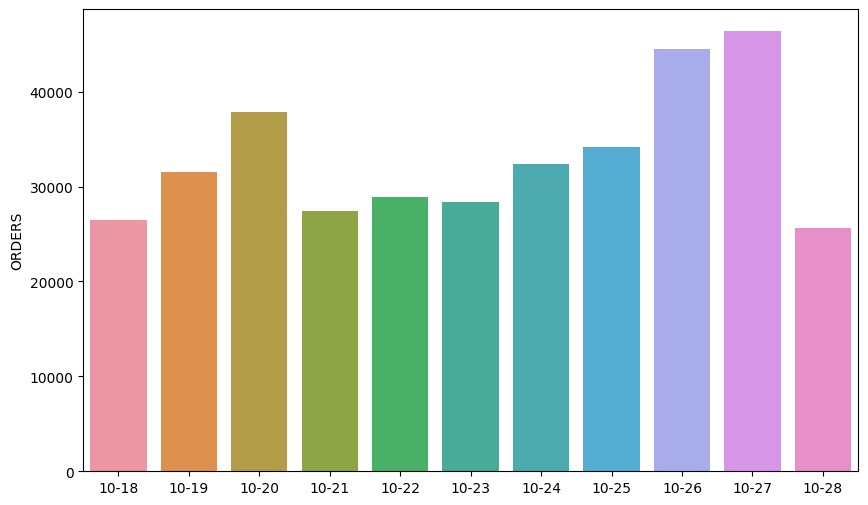

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=dates,y=by_date.ORDERS)

## Category wise comparison

In [14]:
by_cat = df.groupby('CATEGORY').sum()[['ORDERS','ITEM_GMV']].sort_values(['ITEM_GMV'],ascending=False)
by_cat['ITEM_GMV (crores)'] = np.round(by_cat['ITEM_GMV']/10000000,decimals=3)
by_cat['% Total ORD'] = np.round(by_cat['ORDERS']/3634.45,decimals=3)
by_cat['% TOT GMV'] = np.round(by_cat['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=6)
by_cat.drop(['ORDERS','ITEM_GMV'],axis=1)

,ITEM_GMV (crores),% Total ORD,% TOT GMV
CATEGORY,,,
Earphones,25.671,36.517,44.214461
Mobiles,16.336,37.208,28.136897
Tablets,6.280,11.879,10.816585
Speakers,3.955,5.538,6.812702
Laptops,2.586,3.748,4.454290
Other Electronics,1.213,1.138,2.089683
Charger,1.018,2.075,1.753931
TV,0.999,1.898,1.721450


<AxesSubplot:title={'center':'Post-Diwali Sales'}, ylabel='% TOT GMV'>

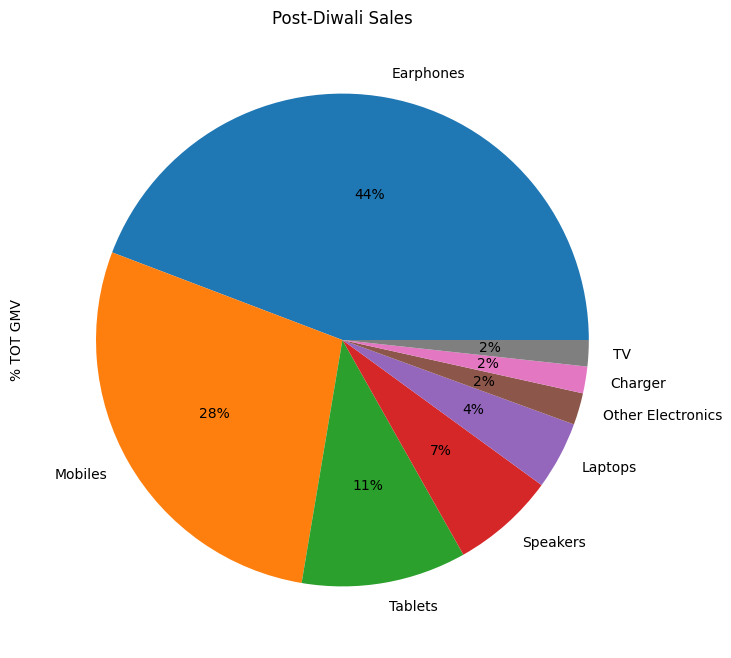

In [15]:
by_cat.plot(kind='pie',y='% TOT GMV',legend=False,autopct='%1.0f%%', figsize=(8,8), title='Post-Diwali Sales')

## Shop wise comparison

In [40]:
by_shop = df.groupby('SHOP').sum()[['ORDERS','ITEM_GMV']].sort_values(['ITEM_GMV'],ascending=False)
by_shop['% TOT ORD'] = np.round(by_shop['ORDERS']/3634.45,decimals=3)
by_shop['% TOT GMV'] = np.round(by_shop['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=6)
by_shop['GMV CUM'] = np.round(by_shop['% TOT GMV'].cumsum(axis=0),decimals=3)
by_shop

,ORDERS,ITEM_GMV,% TOT ORD,% TOT GMV,GMV CUM
SHOP,,,,,
SS ELECTRONICS(Tripolis),10224.0,3.021949e+07,2.813,5.204876,5.205
Samsung & Apple's,8491.0,2.174238e+07,2.336,3.744815,8.950
Bhikharam Chandmal,7023.0,2.097310e+07,1.932,3.612318,12.562
NEW NALANDA Speaker Shop,8596.0,1.232197e+07,2.365,2.122284,14.684
Pathak Tablets,5785.0,1.223304e+07,1.592,2.106967,16.791
...,...,...,...,...,...
ARYAS Cell phones &ELECTRONICS-VANNAREarTAI,1.0,1.200000e+03,0.000,0.000207,99.999
Madhukalash,3.0,1.200000e+03,0.001,0.000207,100.000
Sargodha Cell phones,1.0,1.000000e+03,0.000,0.000172,100.000


In [17]:
by_shop[by_shop['GMV CUM']<26].drop(['ORDERS','ITEM_GMV'],axis=1)

,% TOT ORD,% TOT GMV,GMV CUM
SHOP,,,
SS ELECTRONICS(Tripolis),2.813,5.204876,5.205
Samsung & Apple's,2.336,3.744815,8.950
Bhikharam Chandmal,1.932,3.612318,12.562
NEW NALANDA Speaker Shop,2.365,2.122284,14.684
Pathak Tablets,1.592,2.106967,16.791
Nathu's Cell phones,1.971,2.050997,18.842
Kiranshree Cell phones & Speakers,1.708,1.811203,20.653
Kaveri - Lalpur,1.296,1.658506,22.312
Samsung & Apple's Prabhuji,0.835,1.602397,23.914


## Location wise comparison

In [18]:
by_pin = df.groupby('PINCODE').sum()[['ORDERS','ITEM_GMV']].sort_values(['ITEM_GMV'],ascending=False)
by_pin['% TOT ORD'] = np.round(by_pin['ORDERS']/3634.45,decimals=3)
by_pin['% TOT GMV'] = np.round((by_pin['ITEM_GMV']*100)/df['ITEM_GMV'].sum(),decimals=6)
by_pin['GMV CUM'] = np.round(by_pin['% TOT GMV'].cumsum(axis=0),decimals=3)
by_pin[by_pin['GMV CUM']<51].drop(['ORDERS','ITEM_GMV'],axis=1)
#by_pin.tail(10)

,% TOT ORD,% TOT GMV,GMV CUM
PINCODE,,,
400058.0,13.644,13.378007,13.378
400120.0,5.669,8.423670,21.802
400102.0,4.315,5.536440,27.338
400091.0,5.278,4.013936,31.352
400052.0,3.147,3.369526,34.722
400105.0,3.456,2.965876,37.687
400131.0,3.287,2.878257,40.566
400064.0,2.364,2.494834,43.061
400079.0,2.391,2.359576,45.420


In [41]:
by_pin

,ORDERS,ITEM_GMV,% TOT ORD,% TOT GMV,GMV CUM
PINCODE,,,,,
400058.0,49587.0,7.767265e+07,13.644,13.378007,13.378
400120.0,20604.0,4.890779e+07,5.669,8.423670,21.802
400102.0,15683.0,3.214455e+07,4.315,5.536440,27.338
400091.0,19184.0,2.330490e+07,5.278,4.013936,31.352
400052.0,11438.0,1.956345e+07,3.147,3.369526,34.722
...,...,...,...,...,...
412354.0,18.0,1.663000e+04,0.005,0.002864,99.995
413158.0,13.0,1.270000e+04,0.004,0.002187,99.997
410553.0,6.0,7.600000e+03,0.002,0.001309,99.998


In [19]:
by_pin.to_csv('Pincode-grouped.csv')

In [20]:
df['PINCODE'].describe()

count    267430.000000
mean     402028.958651
std        5348.450756
min      400049.000000
25%      400079.000000
50%      400118.000000
75%      400144.000000
max      421653.000000
Name: PINCODE, dtype: float64

## Category sales across the dates

In [21]:
# Calculating category wise GMV percentage for each row
PCT_TOT_GMV = []

Charger = df.groupby('CATEGORY').sum().loc['Charger']['ITEM_GMV']
Mobiles = df.groupby('CATEGORY').sum().loc['Mobiles']['ITEM_GMV']
Earphones = df.groupby('CATEGORY').sum().loc['Earphones']['ITEM_GMV']
Laptops = df.groupby('CATEGORY').sum().loc['Laptops']['ITEM_GMV']
Tablets = df.groupby('CATEGORY').sum().loc['Tablets']['ITEM_GMV']
Speakers = df.groupby('CATEGORY').sum().loc['Speakers']['ITEM_GMV']
TV = df.groupby('CATEGORY').sum().loc['TV']['ITEM_GMV']

for i in range(df['ORDERS'].size):
    val = 0
    if df['CATEGORY'][i]=='Mobiles':
        val=Mobiles
    elif df['CATEGORY'][i]=='Earphones':
        val=Earphones
    elif df['CATEGORY'][i]=='Tablets':
        val=Tablets
    elif df['CATEGORY'][i]=='Speakers':
        val=Speakers
    elif df['CATEGORY'][i]=='Laptops':
        val=Laptops
    elif df['CATEGORY'][i]=='TV':
        val=TV
    else :
        val=Charger        
    PCT_TOT_GMV.append(val)

# making a column for category wise GMV percentage
df['% CAT GMV'] = np.round((df['ITEM_GMV']*100)/PCT_TOT_GMV,decimals=6)

In [22]:
by_cat_date = df.groupby(['CATEGORY','DATE']).sum()[['ITEM_GMV','% CAT GMV']]
by_cat_date

ITEM_GMV  % CAT GMV
CATEGORY DATE                               
Charger  2019-10-18  8.019438e+05   7.875084
         2019-10-19  8.542633e+05   8.388863
         2019-10-20  1.179637e+06  11.584034
         2019-10-21  8.201505e+05   8.053876
         2019-10-22  9.405590e+05   9.236290
...                           ...        ...
Tablets  2019-10-24  5.682219e+06   9.047935
         2019-10-25  5.594476e+06   8.908209
         2019-10-26  6.828346e+06  10.872937
         2019-10-27  6.497821e+06  10.346652
         2019-10-28  4.540188e+06   7.229429

[88 rows x 2 columns]

In [23]:
by_cat_date.to_excel("./output/grouped by category & date.xlsx")

In [24]:
ear = by_cat_date.loc[(slice('Earphones'))][11:22]
ear

ITEM_GMV  % CAT GMV
CATEGORY  DATE                               
Earphones 2019-10-18  1.143292e+07   4.453732
          2019-10-19  1.330079e+07   5.181310
          2019-10-20  1.552400e+07   6.047419
          2019-10-21  1.307682e+07   5.094108
          2019-10-22  1.464005e+07   5.703036
          2019-10-23  1.613673e+07   6.286028
          2019-10-24  2.323636e+07   9.051636
          2019-10-25  3.281564e+07  12.783248
          2019-10-26  4.667383e+07  18.181675
          2019-10-27  5.115520e+07  19.927419
          2019-10-28  1.871662e+07   7.291018

In [25]:
ear_gmv_datewise = []
for i in range(11):
    ear_gmv_datewise.append((ear['ITEM_GMV']/10000000)[i])

Text(0, 0.5, 'GMV (in Crores)')

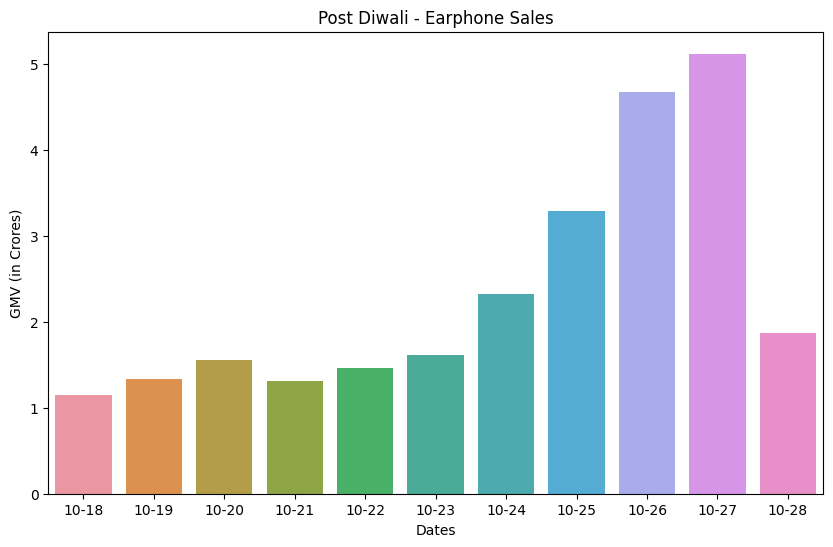

In [26]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=dates,y=ear_gmv_datewise)
ax.set_title('Post Diwali - Earphone Sales')
ax.set_xlabel('Dates')
ax.set_ylabel('GMV (in Crores)')

Text(0, 0.5, 'GMV (in Crores)')

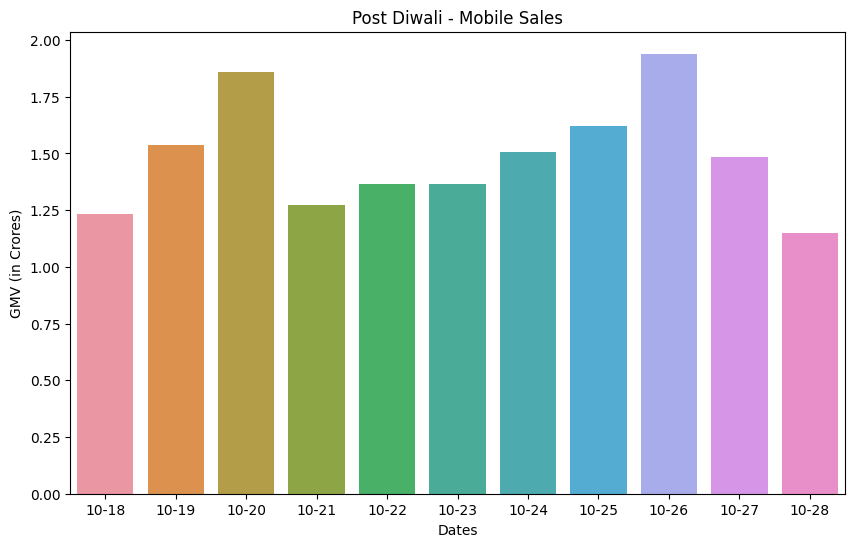

In [27]:
phone = by_cat_date.loc[(slice('Mobiles'))][33:46]
phone_gmv_datewise = []
for i in range(11):
    phone_gmv_datewise.append((phone['ITEM_GMV']/10000000)[i])
plt.figure(figsize=(10,6))
ax = sns.barplot(x=dates,y=phone_gmv_datewise)
ax.set_title('Post Diwali - Mobile Sales')
ax.set_xlabel('Dates')
ax.set_ylabel('GMV (in Crores)')

Text(0, 0.5, 'GMV (in Crores)')

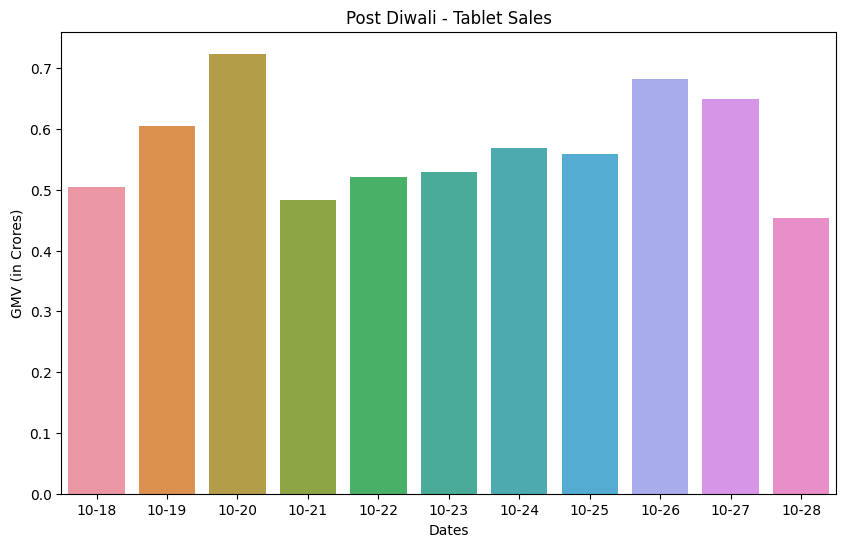

In [28]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=dates,y=by_cat_date.tail(11)['ITEM_GMV']/10000000)
ax.set_title('Post Diwali - Tablet Sales')
ax.set_xlabel('Dates')
ax.set_ylabel('GMV (in Crores)')

In [29]:
qt_or = df[['QTY','ORDERS']]

qt_or['qty/order'] = qt_or['QTY']/qt_or['ORDERS']
qt_or['qty/order'].mean()

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_47693/1311313353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qt_or['qty/order'] = qt_or['QTY']/qt_or['ORDERS']


1.9835038427880238

In [30]:
df[df['CATEGORY']=='Earphones']['ITEM_GMV'].describe()

count     89997.000000
mean       2852.416928
std        7108.299185
min          50.000000
25%         900.000000
50%        1700.000000
75%        2800.000000
max      545300.000000
Name: ITEM_GMV, dtype: float64

<AxesSubplot:xlabel='ITEM_GMV', ylabel='Count'>

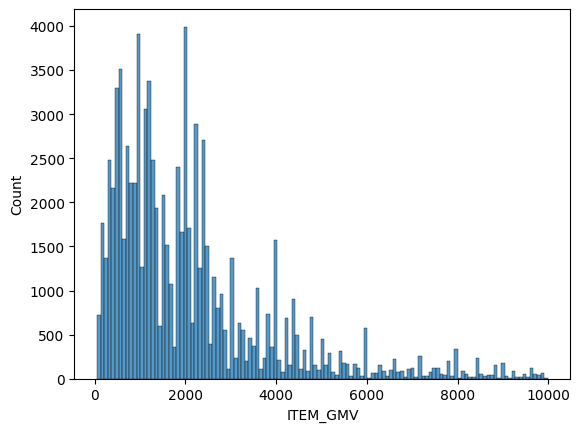

In [31]:
sns.histplot(df[(df['CATEGORY']=='Earphones') & (df['ITEM_GMV']<10000)]['ITEM_GMV'])

<AxesSubplot:ylabel='ITEM_GMV'>

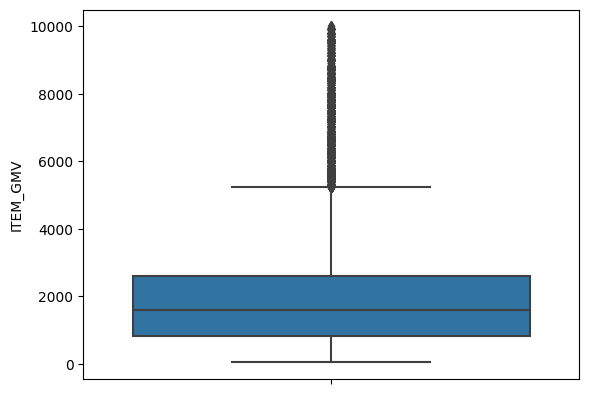

In [32]:
sns.boxplot(y=df[(df['CATEGORY']=='Earphones') & (df['ITEM_GMV']<10000)]['ITEM_GMV'])

<AxesSubplot:xlabel='ITEM_GMV', ylabel='Count'>

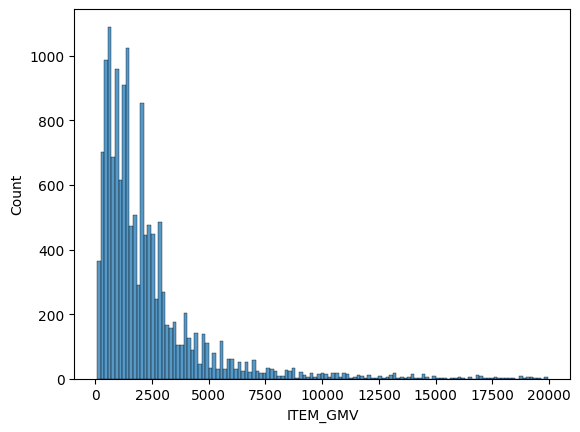

In [33]:
sns.histplot(df[(df['CATEGORY']=='Speakers') & (df['ITEM_GMV']<20000)]['ITEM_GMV'])

<AxesSubplot:ylabel='ITEM_GMV'>

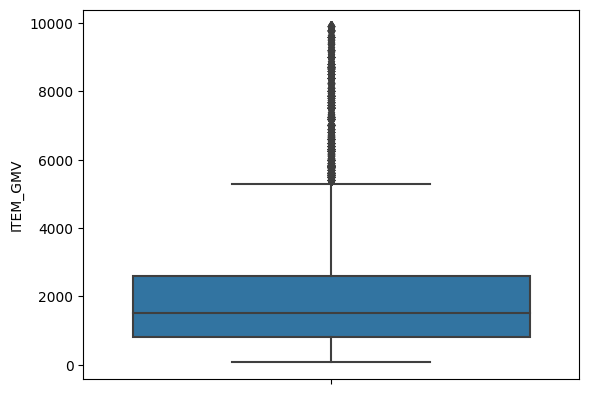

In [34]:
sns.boxplot(y=df[(df['CATEGORY']=='Speakers') & (df['ITEM_GMV']<10000)]['ITEM_GMV'])

In [35]:
df[(df['CATEGORY']=='Earphones') & (df['ITEM_GMV']>10000)].count()

DATE             3104
SHOP_ID          3104
PINCODE          3104
SHOP             3104
ITEM_ID          3104
HR of the day    3104
ORDERS           3104
QTY              3104
ITEM_GMV         3104
CATEGORY         3104
% CAT GMV        3104
dtype: int64

<AxesSubplot:xlabel='ITEM_GMV', ylabel='Count'>

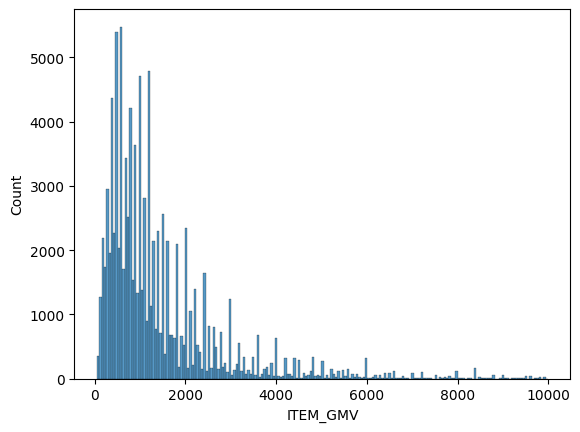

In [36]:
sns.histplot(df[(df['CATEGORY']=='Mobiles') & (df['ITEM_GMV']<10000)]['ITEM_GMV'])

In [37]:
df[(df['CATEGORY']=='Mobiles')]['ITEM_GMV'].describe()

count    104186.000000
mean       1567.990894
std        2342.485336
min          50.000000
25%         600.000000
50%        1000.000000
75%        1800.000000
max      294000.000000
Name: ITEM_GMV, dtype: float64

In [38]:
df[(df['CATEGORY']=='Mobiles') & (df['ITEM_GMV']>5000)].count()

DATE             4082
SHOP_ID          4082
PINCODE          4082
SHOP             4082
ITEM_ID          4082
HR of the day    4082
ORDERS           4082
QTY              4082
ITEM_GMV         4082
CATEGORY         4082
% CAT GMV        4082
dtype: int64

In [39]:
df[(df['CATEGORY']=='Tablets')]['ITEM_GMV'].describe()

count    33743.000000
mean      1861.157776
std       2454.391519
min         50.000000
25%        780.000000
50%       1300.000000
75%       2090.000000
max      92400.000000
Name: ITEM_GMV, dtype: float64